Cluster Analysis (iPython Notebook)
==============================

Clustering with k-Means
------------------------------------
Clustering is one of the most popular unsupervised learning techniques. This technique is used to analyze data and find clusters within that data. In order to find these clusters, we use some kind of similarity measure such as Euclidean distance, to find the subgroups. This similarity measure can estimate the tightness of a cluster. We can say that clustering is the process of organizing our data into subgroups whose elements are similar to each other.

Our goal is to identify the intrinsic properties of data points that make them belong to the same subgroup. There is no universal similarity metric that works for all the cases. It depends on the problem at hand. For example, we might be interested in finding the representative data point for each subgroup or we might be interested in finding the outliers in our data. Depending on the situation, we will end up choosing the appropriate metric.

K-Means algorithm is a well-known algorithm for clustering data. In order to use this algorithm, we need to assume that the number of clusters is known beforehand. We then segment data into K subgroups using various data attributes. We start by fixing the number of clusters and classify our data based on that. The central idea here is that we need to update the locations of these K centroids with each iteration. We continue iterating until we have placed the centroids at their optimal locations.

We can see that the initial placement of centroids plays an important role in the algorithm. These centroids should be placed in a clever manner, because this directly impacts the results. A good strategy is to place them as far away from each other as possible. The basic K-Means algorithm places these centroids randomly where K-Means++ chooses these points algorithmically from the input list of data points. It tries to place the initial centroids far from each other so that it converges quickly. We then go through our training dataset and assign each data point to the closest centroid.

Once we go through the entire dataset, we say that the first iteration is over. We have grouped the points based on the initialized centroids. We now need to recalculate the location of the centroids based on the new clusters that we obtain at the end of the first iteration. Once we obtain the new set of K centroids, we repeat the process again, where we iterate through the dataset and assign each point to the closest centroid.

As we keep repeating these steps, the centroids keep moving to their equilibrium position. After a certain number of iterations, the centroids do not change their locations anymore. This means that we have arrived at the final locations of the centroids. These K centroids are the final K Means that will be used for inference.

Let's apply K-Means clustering on two-dimensional data to see how it works.

In [1]:
# Load required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

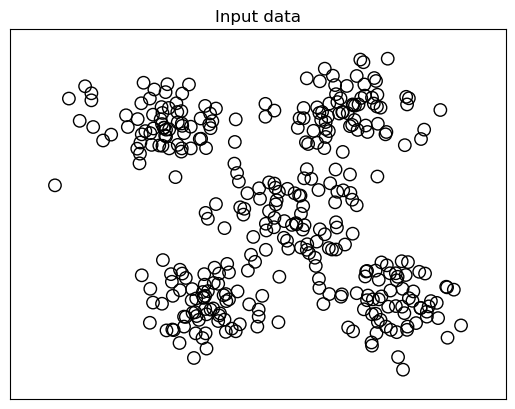

In [2]:
# Load sample data-set
X = np.loadtxt('10_data_clustering.txt', delimiter=',')

# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
        edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [3]:
# Create KMeans object (with 5 clusters)
num_clusters = 5
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10)

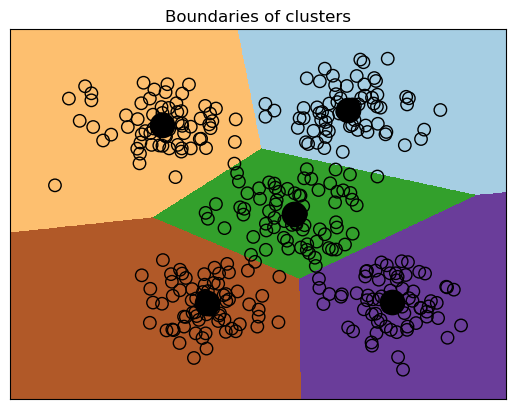

In [4]:
# Visualize the clustering model...

# Step size of the mesh
step_size = 0.01
# Define the grid of points to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

# Predict output labels for all the points on the grid 
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

# Plot different regions and color them 
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), 
               y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired, 
           aspect='auto', 
           origin='lower')

# Overlay input points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
        edgecolors='black', s=80)

# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], 
        marker='o', s=210, linewidths=4, color='black', 
        zorder=12, facecolors='black')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Exercise 10.1: Apply the k-Means algorithm to the following data-set using several values for k (2,3,4,5,6,7).

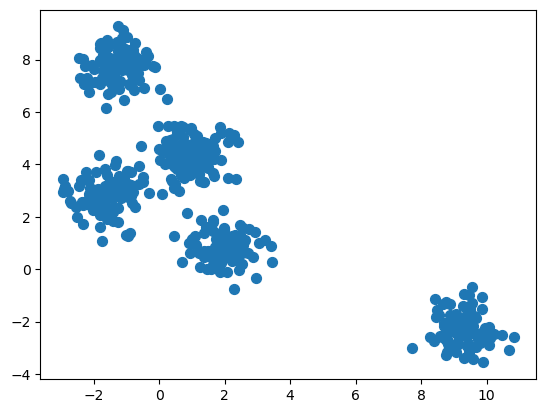

In [8]:
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=500, centers=5,
                       cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

In [14]:
# Visualize the clustering model...

def visualize_k_means(X):

    # Step size of the mesh
    step_size = 0.01
    # Define the grid of points to plot the boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), 
            np.arange(y_min, y_max, step_size))

    # Predict output labels for all the points on the grid 
    output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Plot different regions and color them 
    output = output.reshape(x_vals.shape)
    plt.figure()
    plt.clf()
    plt.imshow(output, interpolation='nearest',
               extent=(x_vals.min(), x_vals.max(), 
                   y_vals.min(), y_vals.max()),
               cmap=plt.cm.Paired, 
               aspect='auto', 
               origin='lower')

    # Overlay input points
    plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
            edgecolors='black', s=80)

    # Plot the centers of clusters
    cluster_centers = kmeans.cluster_centers_
    plt.scatter(cluster_centers[:,0], cluster_centers[:,1], 
            marker='o', s=210, linewidths=4, color='black', 
            zorder=12, facecolors='black')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    plt.title('Boundaries of clusters')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

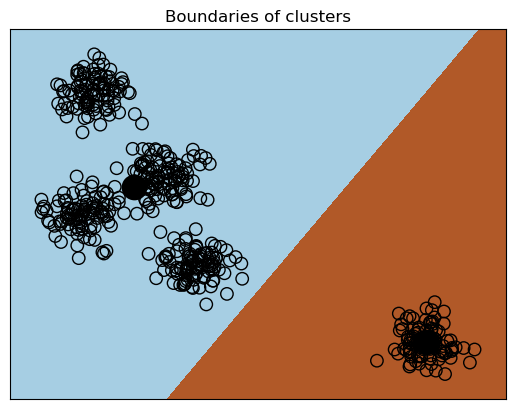

In [15]:
# Create KMeans object (with 2 clusters)
num_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)
    
visualize_k_means(X)

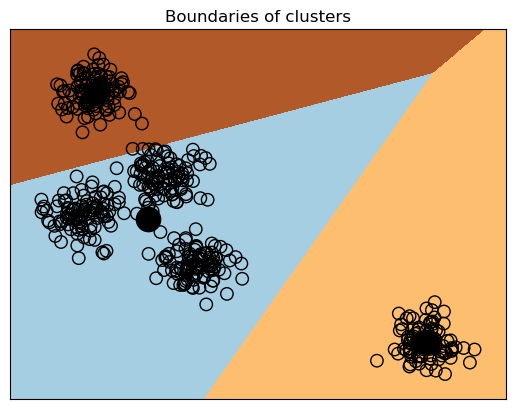

In [16]:
# Create KMeans object (with 3 clusters)
num_clusters = 3
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)
    
visualize_k_means(X)

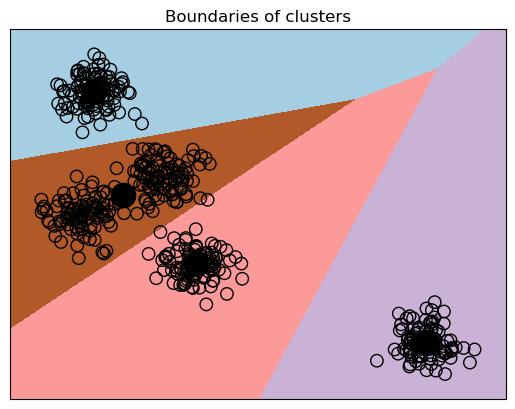

In [17]:
# Create KMeans object (with 4 clusters)
num_clusters = 4
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)
    
visualize_k_means(X)

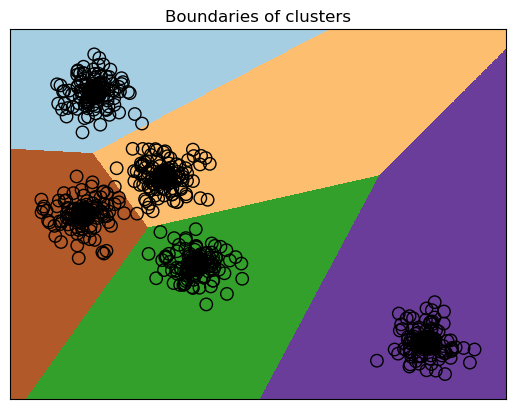

In [18]:
# Create KMeans object (with 5 clusters)
num_clusters = 5
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)
    
visualize_k_means(X)

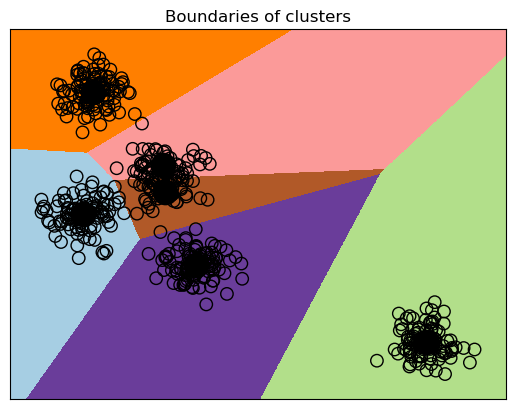

In [19]:
# Create KMeans object (with 6 clusters)
num_clusters = 6
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)
    
visualize_k_means(X)

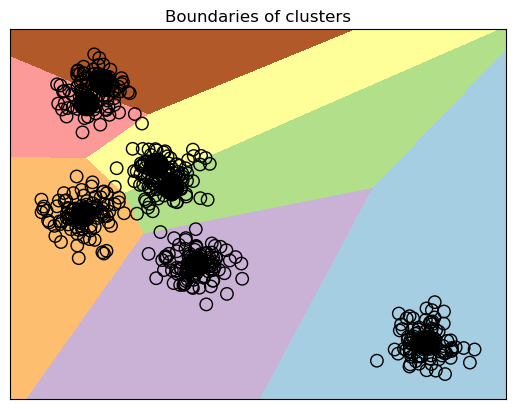

In [20]:
# Create KMeans object (with 7 clusters)
num_clusters = 7
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)
    
visualize_k_means(X)

Estimating clustering quality with silhouette scores
----------------------------------------------------------------------------
If the data is naturally organized into a number of distinct clusters, then it is easy to visually examine it and draw some inferences. But this is rarely the case in the real world. The data in the real world is huge and messy. So we need a way to quantify the quality of the clustering.

Silhouette refers to a method used to check the consistency of clusters in our data. It gives an estimate of how well each data point fits with its cluster. The silhouette score is a metric that measures how similar a data point is to its own cluster, as compared to other clusters. The silhouette score works with any similarity metric.

For each data point, the silhouette score is computed using the following formula:

*silhouette score = (p - q) / max(p, q)*

Here, p is the mean distance to the points in the nearest cluster that the data point is not a part of, and q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1. A score closer to 1 indicates that the data point is very similar to other data points in the cluster, whereas a score closer to -1 indicates that the data point is not similar to the data points in its cluster. One way to think about it is if you get too many points with negative silhouette scores, then we may have too few or too many clusters in our data. We need to run the clustering algorithm again to find the optimal number of clusters.

Let's see how to estimate the clustering performance using silhouette scores.

In [25]:
# Load required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

([], [])

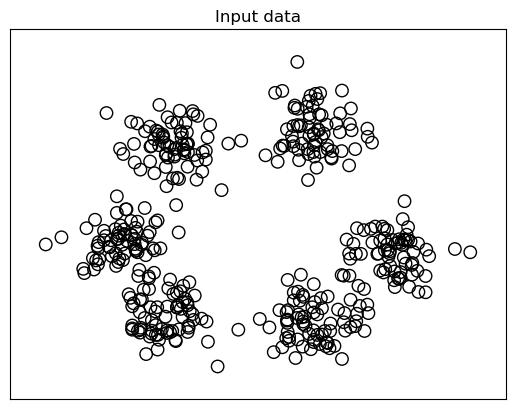

In [26]:
# Load data from input file
X = np.loadtxt('10_data_quality.txt', delimiter=',')

# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o', facecolors='none')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [23]:
# Initialize variables; run k from 2 to 15
scores = []
values = np.arange(2, 16)

# Iterate through the defined range
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.47762624870454473

Number of clusters = 3
Silhouette score = 0.5471742411734871

Number of clusters = 4
Silhouette score = 0.5770200623338163

Number of clusters = 5
Silhouette score = 0.5890032635647954

Number of clusters = 6
Silhouette score = 0.6096904118954453

Number of clusters = 7
Silhouette score = 0.56287537094836

Number of clusters = 8
Silhouette score = 0.5126424875817903

Number of clusters = 9
Silhouette score = 0.47182318484503055

Number of clusters = 10
Silhouette score = 0.3957363489281795

Number of clusters = 11
Silhouette score = 0.3832514228959592

Number of clusters = 12
Silhouette score = 0.34264094385907784

Number of clusters = 13
Silhouette score = 0.35210836426841885

Number of clusters = 14
Silhouette score = 0.3533101989359582

Number of clusters = 15
Silhouette score = 0.35438211859814017



Optimal number of clusters = 6


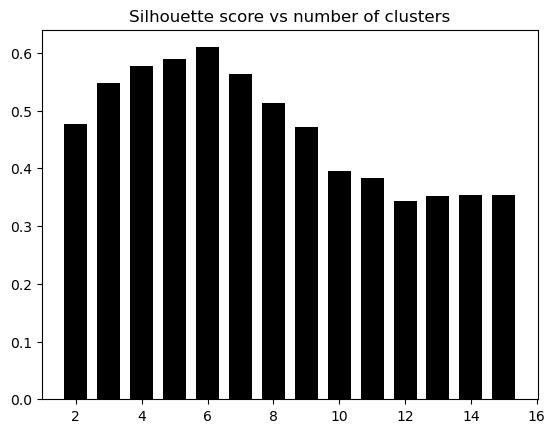

In [24]:
# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

### Exercise 10.2: Calculate the Shilouhette score for the data-set of Exercise 10.1 and build a kMeans clustering models using the optimal k.

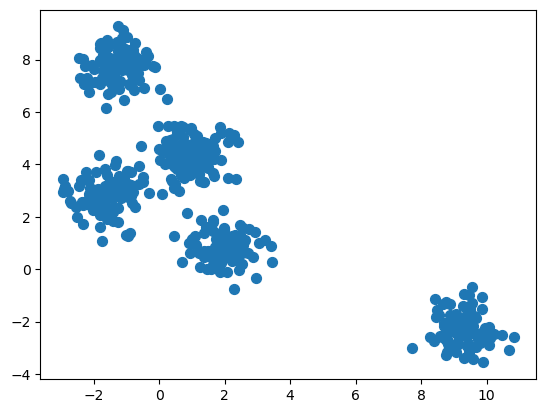

In [30]:
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=500, centers=5,
                       cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

In [31]:
# Initialize variables; run k from 2 to 7
scores = []
values = np.arange(2, 8)

# Iterate through the defined range
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.7034729699100053

Number of clusters = 3
Silhouette score = 0.6134004827920257

Number of clusters = 4
Silhouette score = 0.6484340294732409

Number of clusters = 5
Silhouette score = 0.7173642175642293

Number of clusters = 6
Silhouette score = 0.6454499298712685

Number of clusters = 7
Silhouette score = 0.5294430854452465



Optimal number of clusters = 5


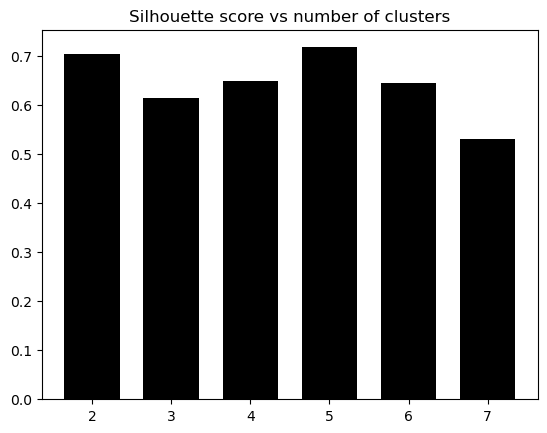

In [32]:
# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

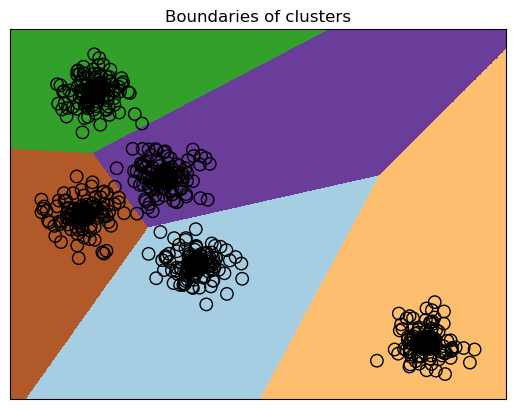

In [33]:
# Create KMeans object (with 5 clusters)
num_clusters = 5
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)
    
visualize_k_means(X)